In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def interpolate1D(arrayNumpy):
  pass

#localidades = np.array(('Usquen','Movil_7ma','Guaymaral', 'San_Cristobal', 'MinAmbiente', 'Centro_de_Alto_Rendimiento' ,'Las_Ferias','Colina', 'Jazmin', 'Puente_Aranda', 'Suba', 'Tunal', 'Fontibon', 'Ciudad_Bolivar'))



# Usaquen: (9,8)
# Movil_7ma: (6,5)
# Guaymaral: (12,7)
# San_Cristobal: (3,2)
# MinAmbiente: (5,6)
# Centro_de_Alto_Rendimiento: (6,6)
# Las_Ferias: (8,5)
# Colina: (10,6)
# Jazmin: (4,4)
# Puente_Aranda: (5,4)
# Suba: (11,5)
# Tunal: (3,3)
# Fontibon: (7,3)
# Ciudad_Bolivar: (3,5)

positionPoints = np.array([
   [9,8],[6,5],[12,7],[3,2],[5,6],
   [6,6],[8,5],[10,6],[4,4],
   [5,4],[11,5],[3,3],[7,3],[3,5]
])


# Velocidad:
# 1 hora
# 2 hora
# 3 hora 
# 4 hora

# Direcciones:
# 1 hora
# 2 hora
# 3 hora 
# 4 hora


localidades = np.array(('Centro_de_Alto_Rendimiento','MinAmbiente'))

#magnitudLocalidades = [ [Información velocidad localidad 1],[Información velocidad localidad 2], [Información velocidad localidad 3]]

magnitudLocalidades = np.empty(len(localidades),dtype=object)

#direccionLocalidades = [ [Información dirección localidad 1],[Información dirección localidad 2], [Información dirección localidad 3]]

direccionLocalidades = np.empty(len(localidades),dtype=object)


for ii,localidad in enumerate(localidades):
  Vel = np.genfromtxt(f'velocidadViento_{localidad}.txt')
  Dir = np.genfromtxt(f'direccionViento_{localidad}.txt')
  magnitudLocalidades[ii] = Vel
  direccionLocalidades[ii] = Dir

print(f'{magnitudLocalidades=}')
print(f'{direccionLocalidades=}')

#Velocidad localidad 1: 1,2,3,4 
#Velocidad localidad 2: 5,6,7,8

#Dirección localidad 1: 20,30,40,50 
#Dirección localidad 2: 60,70,80,90

#[[1,2,3,4],[5,6,7,8]]
#[[20,30,40,50],[60,70,80,90]]
hours = len(magnitudLocalidades[0])

for jj in range(0,hours):
  magnitudLocalidad1H = np.array([arr[jj] for arr in magnitudLocalidades])
  direccionLocalidad1H = np.array([arr[jj] for arr in direccionLocalidades])

  # print(jj)
  # print(f'{magnitudLocalidad1H=}')
  # print(f'{direccionLocalidad1H=}')
  #[1,5], [2,6], [3,7],[4,8]
  #[20,60],[30,70],[40,80],[50,90]

  # Usar np.where para encontrar los índices donde el valor es -1

  indicesMagnitud = np.where(magnitudLocalidad1H == -1)[0] 
  indicesDireccion = np.where(direccionLocalidad1H == -1)[0] 

  
  indicesConcatenado = np.concatenate((indicesMagnitud, indicesDireccion))
  # Eliminar duplicados usando np.unique
  indicesEliminar = np.unique(indicesConcatenado)

  for index in indicesEliminar:
    magnitudLocalidad1H = np.delete(magnitudLocalidad1H, index)
    direccionLocalidad1H = np.delete(direccionLocalidad1H, index)
    points = np.delete(positionPoints, index)

  #magnitud1H = [-1,4,5] (0) -> [4,5] -> 
  #dirección1H = [-1,2,-1] (0,2) -> [2,-1] ->

  # print(jj)
  # print(f'{indicesMagnitud=}')
  # print(f'{indicesDireccion=}')
  
  #Iteración 1: 0
  #Iteración 3: 1
  

  # Usaquen: (9,8)
  # Movil_7ma: (6,5)
  # Guaymaral: (12,7)
  # San_Cristobal: (3,2)
  # MinAmbiente: (5,6)
  # Centro_de_Alto_Rendimiento: (6,6)
  # Las_Ferias: (8,5)
  # Colina: (10,6)
  # Jazmin: (4,4)
  # Puente_Aranda: (5,4)
  # Suba: (11,5)
  # Tunal: (3,3)
  # Fontibon: (7,3)
  # Ciudad_Bolivar: (3,5)

  # positionPoints = np.array([
  #   [9,8],[6,5],[12,7],[3,2],[5,6],
  #   [6,6],[8,5],[10,6],[4,4],
  #   [5,4],[11,5],[3,3],[7,3],[3,5]
  # ])





  # direccionLocalidad1H = direccionLocalidad1H*np.pi/180.0

  # vectors = [0] * len(magnitudLocalidad1H)

  # for i in range(0,len(magnitudLocalidad1H)):
  #   angle = direccionLocalidad1H[i]
  #   mag = magnitudLocalidad1H[i]

  #   vectors[i]= np.array((mag*np.cos(angle),mag*np.sin(angle)))

  # vectors = np.array(vectors)

  # # Crear una malla donde queremos interpolar los vectores
  # grid_x, grid_y = np.mgrid[0:14:20j, 0:10:20j]

  # # Interpolación para cada componente del vector
  # # # Usamos 'cubic' para áreas donde hay suficientes datos y 'nearest' donde no
  # grid_vx_cubic = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic',)
  # grid_vy_cubic = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic',)

  # # # Utilizamos 'nearest' para llenar los valores faltantes donde 'cubic' no puede interpolar
  # grid_vx_nearest = griddata(points, vectors[:, 0], (grid_x, grid_y), method='nearest',)
  # grid_vy_nearest = griddata(points, vectors[:, 1], (grid_x, grid_y), method='nearest',)

  # # # Combinar los resultados de ambas interpolaciones
  # grid_vx_combined = np.where(np.isnan(grid_vx_cubic), grid_vx_nearest, grid_vx_cubic)
  # grid_vy_combined = np.where(np.isnan(grid_vy_cubic), grid_vy_nearest, grid_vy_cubic)

  # grid_vx = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic')
  # grid_vy = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic')

  # # Graficar el campo vectorial interpolado

  # Z = np.sqrt(np.power(grid_vx_combined,2),np.power(grid_vy_combined,2))
  # plt.figure(figsize=(10, 8))
  # plt.pcolormesh(grid_x, grid_y, Z, shading='auto')
  # plt.colorbar()

  # plt.quiver(grid_x, grid_y, grid_vx_combined, grid_vy_combined,color='blue', width=0.002)

  # plt.scatter(points[:, 0], points[:, 1], c='black', s=100, edgecolor='k', label='Estaciones')


  # x_positions = points[:,0]
  # y_positions = points[:,1]
  # vx_values = vectors[:,0]
  # vy_values = vectors[:,1]
  # plt.quiver(x_positions, y_positions, vx_values,vy_values, color='black', width=0.003)


  # plt.title('Interpolación Bidimensional de Vectores con Combinación de Métodos')
  # plt.xlabel('Ly')
  # plt.ylabel('Lx')
  # plt.legend()

  # plt.savefig('campoVelocidades.png')
  # plt.show()
#Que grande brrrrrrrrrr

FileNotFoundError: velocidadViento_Centro_de_Alto_Rendimiento.txt not found.

ANTIGUO:

np.array([arr[0:24] for arr in direccionLocalidades])=array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        ,  1.55334303,  1.60570291,  1.90240888,
         2.14675498,  2.61799388,  3.01941961,  2.3387412 ,  2.19911486,
         2.19911486,  2.60054059,  2.58308729,  2.75762022,  3.29867229,
         3.19395253,  2.84488668,  1.58824962,  1.37881011],
       [ 1.72787596,  1.95476876,  1.65806279,  1.65806279,  1.98967535,
         2.30383461,  1.79768913,  2.54818071,  1.41371669,  1.43116999,
         1.53588974,  1.97222205,  2.23402144,  1.72787596,  1.51843645,
         1.69296937,  3.2637657 ,  2.98451302,  1.30899694,  1.8675023 ,
         1.78023584,  2.05948852,  2.00712864,  1.8675023 ]])
np.array([arr[0:24] for arr in magnitudLocalidades])=array([[-1., -1., -1., -1., -1., -1., -1.,  2.,  3.,  4.,  3.,  3.,  3.,
         4.,  4.,  4.,  3.,  3.,  2.,  2.,  2.,  3.,  2.,  2.],
       [ 3.,  2.,  2.,  3.,  2.,  1.,  2.,  1.,  

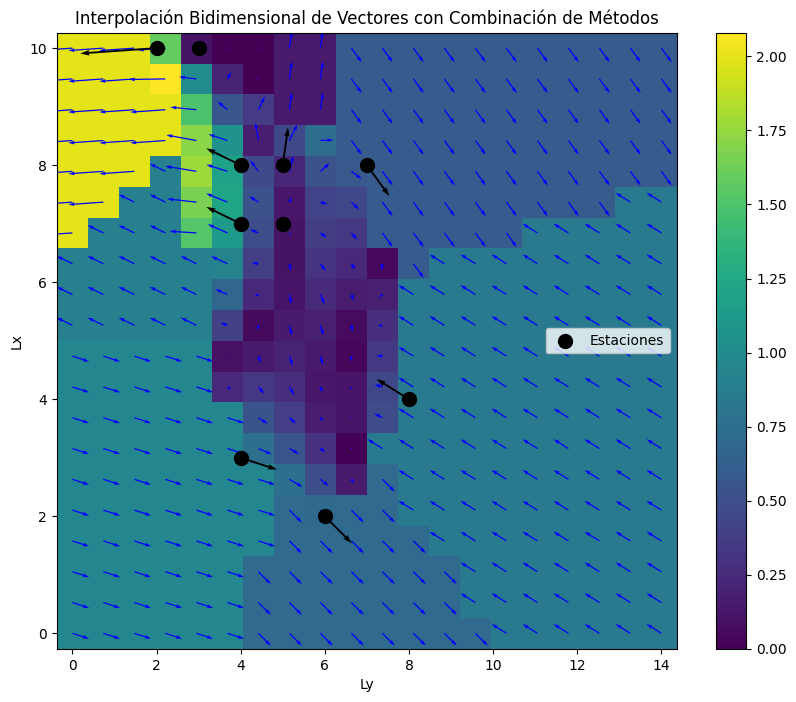

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def interpolate1D(arrayNumpy):
  pass

#localidades = np.array(('Usquen','Movil_7ma','Guaymaral', 'San_Cristobal', 'MinAmbiente', 'Centro_de_Alto_Rendimiento' ,'Las_Ferias','Colina', 'Jazmin', 'Puente_Aranda', 'Suba', 'Tunal', 'Fontibon', 'Ciudad_Bolivar'))

# Usaquen: (8,4) Id:116
# Movil_7ma: (7,8) Id:106
# Guaymaral: (6,2)  Id: 86
# San_Cristobal: (5,10) Id: 80
# MinAmbiente: (5,8) Id: 78
# Centro_de_Alto_Rendimiento: (5,7) Id:77
# Las_Ferias: (5,6) Id: 76
# Colina: (5,3) Id:73
# Jazmin: (4,8) Id:64
# Puente_Aranda: (4,7) Id:63
# Suba: (4,3) Id:59
# Tunal: (3,10) Id: 52
# Fontibon: (3,5) Id:47
# Ciudad_Bolivar: (2,10) Id: 38 


points = np.array([
    [8,4],[7,8],[6,2],[5,10],[5,8],
    [5,7],[5,6],[5,3],[4,8],[4,7],
    [4,3],[3,10],[3,5],[2,10]
])


localidades = np.array(('Centro_de_Alto_Rendimiento','MinAmbiente'))

#Vector de vectores que guarda en cada espacio la magnitud o dirección de cada localidad.
magnitudLocalidades = np.empty(len(localidades),dtype=object)
direccionLocalidades = np.empty(len(localidades),dtype=object)

for ii,localidad in enumerate(localidades):
  Vel = np.genfromtxt(f'/content/datosTXT/velocidadViento_{localidad}.txt')
  Dir = np.genfromtxt(f'/content/datosTXT/direccionViento_{localidad}.txt')
  magnitudLocalidades[ii] = Vel
  direccionLocalidades[ii] = Dir


totalDays = len(magnitudLocalidades[0])

#print(f'{np.array([arr[0:24] for arr in direccionLocalidades])=}')
#print(f'{np.array([arr[0:24] for arr in magnitudLocalidades])=}')


#Se extraen de a 24 datos, es decir, 1 día, para hacer interpolación de los datos faltantes.

for day in range(0,totalDays):
#for day in range(0,2):

  startIndex = day*(23+1)
  finalIndex= startIndex+(23+1)
  magnitudLocalidad1D = np.array([arr[startIndex:finalIndex] for arr in magnitudLocalidades])
  direccionLocalidad1D = np.array([arr[startIndex:finalIndex] for arr in direccionLocalidades])

  ###########Falta manejar si un día completo no tiene datos ó si están incompletos.
  interpolate1D(magnitudLocalidad1D)
  interpolate1D(direccionLocalidad1D)
  #########################################

  #Para cada hora, hago una interpolación.
  for hora in range(0,24):
    magnitudLocalidad1H = np.array([arr[hora] for arr in magnitudLocalidad1D])
    direccionLocalidad1H = np.array([arr[hora] for arr in direccionLocalidad1D])

    # print(f'{day=}')
    # print(f'{magnitudLocalidad1H=}')
    # print(f'{direccionLocalidad1H=}')

    magnitudes = magnitudLocalidad1H
    direcciones = direccionLocalidad1H

    vectors = [0] * len(magnitudes)

    for i in range(0,len(magnitudes)):
      angle = direcciones[i]
      mag = magnitudes[i]

      vectors[i]= np.array((mag*np.cos(angle),mag*np.sin(angle)))

    vectors = np.array(vectors)
    print(f'{vectors=}')


    # Crear una malla donde queremos interpolar los vectores
    grid_x, grid_y = np.mgrid[0:14:20j, 0:10:20j]

    # Interpolación para cada componente del vector
    # # Usamos 'cubic' para áreas donde hay suficientes datos y 'nearest' donde no
    grid_vx_cubic = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic',)
    grid_vy_cubic = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic',)

    # # Utilizamos 'nearest' para llenar los valores faltantes donde 'cubic' no puede interpolar
    grid_vx_nearest = griddata(points, vectors[:, 0], (grid_x, grid_y), method='nearest',)
    grid_vy_nearest = griddata(points, vectors[:, 1], (grid_x, grid_y), method='nearest',)

    # # Combinar los resultados de ambas interpolaciones
    grid_vx_combined = np.where(np.isnan(grid_vx_cubic), grid_vx_nearest, grid_vx_cubic)
    grid_vy_combined = np.where(np.isnan(grid_vy_cubic), grid_vy_nearest, grid_vy_cubic)

    grid_vx = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic')
    grid_vy = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic')

    # Graficar el campo vectorial interpolado

    Z = np.sqrt(np.power(grid_vx_combined,2),np.power(grid_vy_combined,2))
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(grid_x, grid_y, Z, shading='auto')
    plt.colorbar()

    plt.quiver(grid_x, grid_y, grid_vx_combined, grid_vy_combined,color='blue', width=0.002)

    plt.scatter(points[:, 0], points[:, 1], c='black', s=100, edgecolor='k', label='Estaciones')


    x_positions = points[:,0]
    y_positions = points[:,1]
    vx_values = vectors[:,0]
    vy_values = vectors[:,1]
    plt.quiver(x_positions, y_positions, vx_values,vy_values, color='black', width=0.003)


    plt.title('Interpolación Bidimensional de Vectores con Combinación de Métodos')
    plt.xlabel('Ly')
    plt.ylabel('Lx')
    plt.legend()

    plt.savefig('campoVelocidades.png')
    plt.show()



In [ ]:
# Usaquen: (8,4) Id:116
# Movil_7ma: (7,8) Id:106
# Guaymaral: (6,2)  Id: 86
# San_Cristobal: (5,10) Id: 80 [5,10]
# MinAmbiente: (5,8) Id: 78
# Centro_de_Alto_Rendimiento: (5,7) Id:77
# Las_Ferias: (5,6) Id: 76 [5,6]
# Colina: (5,3) Id:73 [5,3]
# Jazmin: (4,8) Id:64
# Puente_Aranda: (4,7) Id:63
# Suba: (4,3) Id:59
# Tunal: (3,10) Id: 52
# Fontibon: (3,5) Id:47 [3,5]
# Ciudad_Bolivar: (2,10) Id: 38


points = np.array([
    [8,4],[7,8],[6,2],[5,8],
    [5,7],[4,8],[4,7],
    [4,3],[3,10],[2,10]
])



magnitudes= np.array((1,1,1,1,0,1, 1,1,0,2))
direcciones = np.array((148,306,315,82,342,154,154,342,127,184))
direcciones = direcciones*np.pi/180.0

vectors = [0] * len(magnitudes)
#vectors = np.empty(len(magnitudes),dtype=object)

for i in range(0,len(magnitudes)):
  angle = direcciones[i]
  mag = magnitudes[i]

  vectors[i]= np.array((mag*np.cos(angle),mag*np.sin(angle)))

vectors = np.array(vectors)
print(f'{vectors=}')

'''
for i in range(1):
  vectors[0]=[1,0]
  vectors[1]=[0,1]
  vectors[2]=[ColVel[i]*np.cos(ColDir[i]), ColVel[i]*np.sin(ColDir[i])]
  vectors[3]=[0,0.5]
  vectors[4]=[0.5,0]
  vectors[5]=[1,0]
  vectors[6]=[0,1]
  vectors[7]=[0,2]
  vectors[8]=[0.4,0]
  vectors[9]=[0,0.3]
  vectors[10]=[0,0.8]
  vectors[11]=[1,1.2]
  vectors[12]=[0,0.6]
  vectors[13]=[1.0,0.6]
'''
# Crear una malla donde queremos interpolar los vectores
grid_x, grid_y = np.mgrid[0:14:20j, 0:10:20j]

# Interpolación para cada componente del vector
# # Usamos 'cubic' para áreas donde hay suficientes datos y 'nearest' donde no
grid_vx_cubic = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic',)
grid_vy_cubic = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic',)

# # Utilizamos 'nearest' para llenar los valores faltantes donde 'cubic' no puede interpolar
grid_vx_nearest = griddata(points, vectors[:, 0], (grid_x, grid_y), method='nearest',)
grid_vy_nearest = griddata(points, vectors[:, 1], (grid_x, grid_y), method='nearest',)

# # Combinar los resultados de ambas interpolaciones
grid_vx_combined = np.where(np.isnan(grid_vx_cubic), grid_vx_nearest, grid_vx_cubic)
grid_vy_combined = np.where(np.isnan(grid_vy_cubic), grid_vy_nearest, grid_vy_cubic)

grid_vx = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic')
grid_vy = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic')

# Graficar el campo vectorial interpolado

Z = np.sqrt(np.power(grid_vx_combined,2),np.power(grid_vy_combined,2))
plt.figure(figsize=(10, 8))
plt.pcolormesh(grid_x, grid_y, Z, shading='auto')
plt.colorbar()

plt.quiver(grid_x, grid_y, grid_vx_combined, grid_vy_combined,color='blue', width=0.002)

plt.scatter(points[:, 0], points[:, 1], c='black', s=100, edgecolor='k', label='Estaciones')


x_positions = points[:,0]
y_positions = points[:,1]
vx_values = vectors[:,0]
vy_values = vectors[:,1]
plt.quiver(x_positions, y_positions, vx_values,vy_values, color='black', width=0.003)


plt.title('Interpolación Bidimensional de Vectores con Combinación de Métodos')
plt.xlabel('Ly')
plt.ylabel('Lx')
plt.legend()

plt.savefig('campoVelocidades.png')
plt.show()





[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan  0.        ]
 [        nan         nan         nan         nan         nan         nan
          nan -0.04437302  0.06505008  0.19694721]
 [        nan         nan         nan         nan         nan -0.0293847
   0.04839584  0.1399478   0.26427295  0.39719294]
 [        nan         nan         nan  0.08513745  0.12157214  0.17345358
   0.24446071  0.34704577  0.47565507  0.60203156]
 [        nan         nan         nan  0.34379436  0.35836419  0.39835632
   0.46931753  0.56942111  0.69529461  0.81275748]
 [        nan         nan  0.63728197  0.61789802  0.62057854  0.65179657
   0.71321486  0.8044783   0.92211583  1.03066507]
 [        nan         nan  0.93728472  0.91112736  0.91376196  0.93543707
   0.98070096  1.05499076  1.15741311  1.25704874]
 [        nan  1.28896031  1.2510589   1.23593463  1.23608775  1.24892272
   1.27721297  1.32762182  1.405344    1.49320285]
 

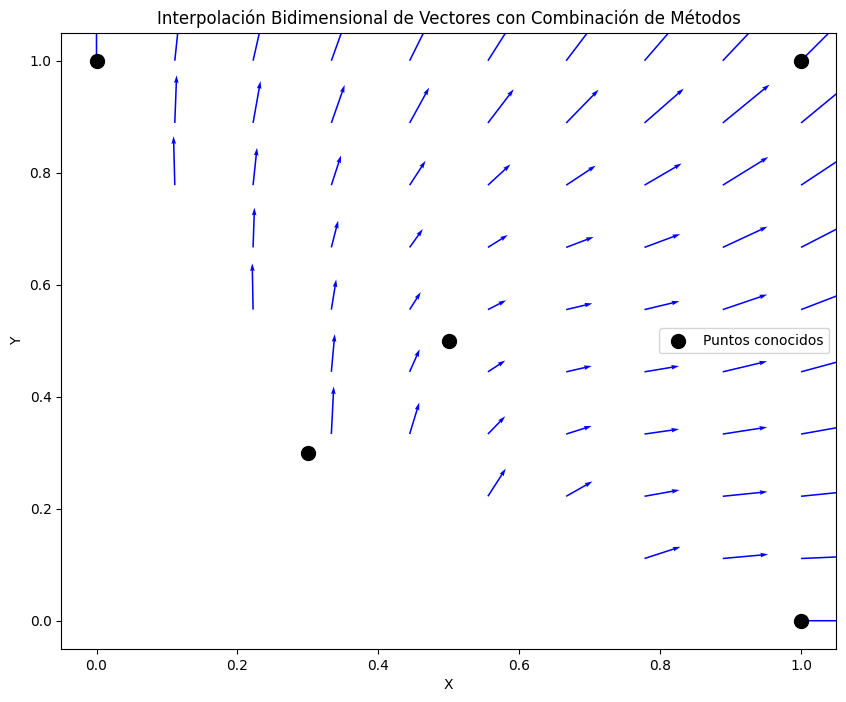

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


# Datos conocidos
points = np.array([
    [0.3, 0.3], [1, 0], [0, 1], [1, 1],
    [0.5, 0.5]
])
vectors = np.array([
    [0, 2],
    [2, 0],
    [0, 2],
    [2, 2],
    [0.5, 0.5]
])

# Puntos donde queremos interpolar
grid_x, grid_y = np.mgrid[0:1:10j, 0:1:10j]

# # Interpolación para cada componente del vector


# # Usamos 'cubic' para áreas donde hay suficientes datos y 'nearest' donde no

grid_vx_cubic = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic')
grid_vy_cubic = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic')

# # # Utilizamos 'nearest' para llenar los valores faltantes donde 'cubic' no puede interpolar

grid_vx_nearest = griddata(points, vectors[:, 0], (grid_x, grid_y), method='nearest')
grid_vy_nearest = griddata(points, vectors[:, 1], (grid_x, grid_y), method='nearest')

# # # Combinar los resultados de ambas interpolaciones

# grid_vx_combined = np.where(np.isnan(grid_vx_cubic), grid_vx_nearest, grid_vx_cubic)
# grid_vy_combined = np.where(np.isnan(grid_vy_cubic), grid_vy_nearest, grid_vy_cubic)

# Interpolación para cada componente del vector
grid_vx = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic')
grid_vy = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic')

print(grid_vx)

# Graficar el campo vectorial interpolado
plt.figure(figsize=(10, 8))
plt.quiver(grid_x, grid_y, grid_vx, grid_vy,color='blue', width=0.002)
#plt.quiver(grid_x, grid_y, grid_vx_combined, grid_vy_combined,color='blue', width=0.002)
plt.scatter(points[:, 0], points[:, 1], c='black', s=100, edgecolor='k', label='Puntos conocidos')
plt.title('Interpolación Bidimensional de Vectores con Combinación de Métodos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
'''
import imageio.v3 as iio
images = []
filenames = ['imagen0.png', 'imagen1.png', 'imagen2.png', 'imagen3.png', 'imagen4.png',
            'imagen5.png', 'imagen6.png', 'imagen7.png', 'imagen8.png', 'imagen9.png',
            'imagen10.png', 'imagen11.png', 'imagen12.png', 'imagen13.png', 'imagen14.png',
            'imagen15.png', 'imagen16.png', 'imagen17.png', 'imagen18.png', 'imagen19.png',
            'imagen20.png', 'imagen21.png', 'imagen22.png', 'imagen23.png']

for filename in filenames:
  images.append(iio.imread(filename))

iio.imwrite('team.gif', images, duration = 500, loop = 0)
'''

In [3]:
import numpy as np

# Supongamos que 'arr' es tu arreglo unidimensional de tamaño 14 con valores -1 desde el índice 0 hasta el 6
arr = np.array([1,3,-1,-1,-1,-1,-1,-1, 8, 6, 8, 10, 12, 14])

# Creamos un arreglo de índices donde los valores no son -1
non_negative_indices = np.where(arr != -1)[0]

# Utilizamos estos índices y sus correspondientes valores para realizar la interpolación
interpolated_values = np.interp(np.arange(len(arr)), non_negative_indices, arr[non_negative_indices])

print("Valores interpolados:")
print(interpolated_values)

# Reemplazamos los valores -1 en 'arr' con los valores interpolados
arr[arr == -1] = interpolated_values[arr == -1]

print("\nArreglo después de la interpolación:")
print(arr)

Valores interpolados:
[ 1.          3.          3.71428571  4.42857143  5.14285714  5.85714286
  6.57142857  7.28571429  8.          6.          8.         10.
 12.         14.        ]

Arreglo después de la interpolación:
[ 1  3  3  4  5  5  6  7  8  6  8 10 12 14]
